In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  7.70it/s]

10it [00:00, 10.60it/s]

19it [00:00, 14.40it/s]

28it [00:00, 19.22it/s]

37it [00:00, 25.16it/s]

46it [00:00, 32.07it/s]

55it [00:00, 39.70it/s]

64it [00:00, 47.52it/s]

73it [00:00, 55.08it/s]

82it [00:01, 62.21it/s]

91it [00:01, 68.28it/s]

100it [00:01, 73.38it/s]

109it [00:01, 77.64it/s]

118it [00:01, 80.90it/s]

127it [00:01, 83.17it/s]

136it [00:01, 85.10it/s]

145it [00:01, 86.20it/s]

154it [00:01, 87.24it/s]

164it [00:01, 88.18it/s]

173it [00:02, 88.61it/s]

182it [00:02, 88.82it/s]

191it [00:02, 89.00it/s]

201it [00:02, 89.50it/s]

210it [00:02, 89.51it/s]

219it [00:02, 89.30it/s]

229it [00:02, 89.67it/s]

238it [00:02, 89.54it/s]

247it [00:02, 89.51it/s]

256it [00:02, 89.55it/s]

265it [00:03, 89.50it/s]

274it [00:03, 89.54it/s]

283it [00:03, 89.60it/s]

293it [00:03, 89.75it/s]

302it [00:03, 89.50it/s]

311it [00:03, 89.51it/s]

320it [00:03, 89.47it/s]

329it [00:03, 89.37it/s]

338it [00:03, 89.49it/s]

348it [00:04, 89.67it/s]

357it [00:04, 89.28it/s]

366it [00:04, 89.31it/s]

375it [00:04, 89.51it/s]

385it [00:04, 89.64it/s]

394it [00:04, 89.35it/s]

403it [00:04, 89.32it/s]

412it [00:04, 89.28it/s]

421it [00:04, 89.47it/s]

431it [00:04, 89.69it/s]

440it [00:05, 89.52it/s]

450it [00:05, 89.77it/s]

459it [00:05, 89.55it/s]

468it [00:05, 89.25it/s]

477it [00:05, 88.83it/s]

486it [00:05, 89.18it/s]

495it [00:05, 89.24it/s]

504it [00:05, 89.16it/s]

513it [00:05, 89.06it/s]

522it [00:05, 88.92it/s]

531it [00:06, 88.87it/s]

540it [00:06, 88.91it/s]

549it [00:06, 89.14it/s]

559it [00:06, 89.40it/s]

568it [00:06, 89.07it/s]

577it [00:06, 89.03it/s]

586it [00:06, 89.10it/s]

595it [00:06, 89.01it/s]

604it [00:06, 88.90it/s]

613it [00:06, 88.94it/s]

622it [00:07, 88.93it/s]

631it [00:07, 88.94it/s]

640it [00:07, 88.59it/s]

649it [00:07, 88.23it/s]

658it [00:07, 88.68it/s]

668it [00:07, 89.10it/s]

677it [00:07, 89.12it/s]

686it [00:07, 89.17it/s]

695it [00:07, 88.91it/s]

704it [00:08, 88.83it/s]

714it [00:08, 89.18it/s]

723it [00:08, 89.20it/s]

732it [00:08, 89.22it/s]

741it [00:08, 89.34it/s]

751it [00:08, 89.51it/s]

760it [00:08, 89.44it/s]

770it [00:08, 89.59it/s]

779it [00:08, 89.71it/s]

788it [00:08, 89.56it/s]

797it [00:09, 89.41it/s]

806it [00:09, 89.40it/s]

815it [00:09, 89.21it/s]

824it [00:09, 89.13it/s]

833it [00:09, 89.08it/s]

842it [00:09, 88.91it/s]

851it [00:09, 88.96it/s]

861it [00:09, 89.29it/s]

870it [00:09, 89.18it/s]

879it [00:09, 89.42it/s]

888it [00:10, 89.16it/s]

898it [00:10, 89.38it/s]

907it [00:10, 89.36it/s]

916it [00:10, 89.43it/s]

925it [00:10, 89.03it/s]

934it [00:10, 89.19it/s]

944it [00:10, 89.52it/s]

953it [00:10, 89.58it/s]

962it [00:10, 89.61it/s]

971it [00:10, 89.67it/s]

980it [00:11, 89.56it/s]

989it [00:11, 89.47it/s]

998it [00:11, 89.30it/s]

1007it [00:11, 89.08it/s]

1016it [00:11, 88.75it/s]

1025it [00:11, 88.61it/s]

1034it [00:11, 88.74it/s]

1043it [00:11, 89.06it/s]

1053it [00:11, 89.36it/s]

1062it [00:12, 89.32it/s]

1071it [00:12, 89.15it/s]

1080it [00:12, 89.07it/s]

1089it [00:12, 89.02it/s]

1099it [00:12, 89.32it/s]

1108it [00:12, 89.21it/s]

1117it [00:12, 89.40it/s]

1126it [00:12, 89.55it/s]

1136it [00:12, 89.71it/s]

1145it [00:12, 89.75it/s]

1154it [00:13, 89.47it/s]

1163it [00:13, 89.20it/s]

1172it [00:13, 89.07it/s]

1182it [00:13, 89.30it/s]

1191it [00:13, 89.02it/s]

1200it [00:13, 88.86it/s]

1209it [00:13, 88.98it/s]

1218it [00:13, 88.93it/s]

1227it [00:13, 88.91it/s]

1236it [00:13, 88.67it/s]

1245it [00:14, 88.71it/s]

1254it [00:14, 88.78it/s]

1263it [00:14, 88.60it/s]

1272it [00:14, 87.99it/s]

1281it [00:14, 88.19it/s]

1290it [00:14, 88.24it/s]

1299it [00:14, 88.31it/s]

1308it [00:14, 88.40it/s]

1318it [00:14, 88.93it/s]

1327it [00:14, 88.86it/s]

1336it [00:15, 88.65it/s]

1345it [00:15, 88.74it/s]

1354it [00:15, 88.56it/s]

1363it [00:15, 88.60it/s]

1372it [00:15, 88.61it/s]

1381it [00:15, 88.32it/s]

1390it [00:15, 88.58it/s]

1399it [00:15, 88.72it/s]

1408it [00:15, 88.51it/s]

1417it [00:16, 88.58it/s]

1426it [00:16, 88.91it/s]

1435it [00:16, 89.05it/s]

1444it [00:16, 89.33it/s]

1454it [00:16, 89.70it/s]

1464it [00:16, 89.89it/s]

1473it [00:16, 89.32it/s]

1482it [00:16, 89.27it/s]

1491it [00:16, 89.26it/s]

1500it [00:16, 89.00it/s]

1509it [00:17, 88.87it/s]

1518it [00:17, 88.83it/s]

1527it [00:17, 88.56it/s]

1536it [00:17, 88.73it/s]

1545it [00:17, 89.06it/s]

1555it [00:17, 89.36it/s]

1564it [00:17, 89.10it/s]

1573it [00:17, 89.22it/s]

1582it [00:17, 89.17it/s]

1591it [00:17, 89.00it/s]

1600it [00:18, 89.10it/s]

1609it [00:18, 88.97it/s]

1618it [00:18, 88.79it/s]

1627it [00:18, 88.71it/s]

1636it [00:18, 88.67it/s]

1645it [00:18, 88.65it/s]

1654it [00:18, 88.98it/s]

1663it [00:18, 89.23it/s]

1673it [00:18, 89.53it/s]

1682it [00:18, 89.02it/s]

1691it [00:19, 88.85it/s]

1700it [00:19, 88.83it/s]

1709it [00:19, 88.77it/s]

1718it [00:19, 88.69it/s]

1727it [00:19, 88.57it/s]

1736it [00:19, 88.90it/s]

1745it [00:19, 88.98it/s]

1754it [00:19, 89.14it/s]

1764it [00:19, 89.41it/s]

1773it [00:20, 89.31it/s]

1782it [00:20, 89.28it/s]

1791it [00:20, 89.34it/s]

1801it [00:20, 89.51it/s]

1810it [00:20, 89.42it/s]

1819it [00:20, 89.58it/s]

1828it [00:20, 89.66it/s]

1838it [00:20, 89.91it/s]

1847it [00:20, 89.51it/s]

1856it [00:20, 89.57it/s]

1866it [00:21, 89.81it/s]

1875it [00:21, 89.68it/s]

1884it [00:21, 89.45it/s]

1893it [00:21, 89.23it/s]

1902it [00:21, 89.39it/s]

1911it [00:21, 89.36it/s]

1920it [00:21, 89.29it/s]

1929it [00:21, 88.95it/s]

1938it [00:21, 89.13it/s]

1947it [00:21, 88.91it/s]

1956it [00:22, 88.77it/s]

1965it [00:22, 88.71it/s]

1974it [00:22, 88.87it/s]

1983it [00:22, 89.17it/s]

1992it [00:22, 89.42it/s]

2001it [00:22, 89.40it/s]

2010it [00:22, 89.47it/s]

2019it [00:22, 89.11it/s]

2028it [00:22, 89.22it/s]

2037it [00:22, 89.36it/s]

2046it [00:23, 89.37it/s]

2056it [00:23, 89.56it/s]

2065it [00:23, 89.26it/s]

2074it [00:23, 89.23it/s]

2083it [00:23, 89.15it/s]

2092it [00:23, 89.37it/s]

2101it [00:23, 89.42it/s]

2110it [00:23, 89.53it/s]

2120it [00:23, 89.61it/s]

2129it [00:23, 89.44it/s]

2138it [00:24, 89.28it/s]

2147it [00:24, 88.89it/s]

2156it [00:24, 88.54it/s]

2165it [00:24, 88.73it/s]

2174it [00:24, 88.35it/s]

2183it [00:24, 88.09it/s]

2193it [00:24, 88.77it/s]

2202it [00:24, 89.08it/s]

2211it [00:24, 89.16it/s]

2221it [00:25, 89.42it/s]

2230it [00:25, 89.11it/s]

2239it [00:25, 89.26it/s]

2248it [00:25, 88.93it/s]

2257it [00:25, 88.83it/s]

2266it [00:25, 88.95it/s]

2276it [00:25, 89.35it/s]

2285it [00:25, 89.26it/s]

2294it [00:25, 88.99it/s]

2303it [00:25, 88.94it/s]

2312it [00:26, 89.01it/s]

2321it [00:26, 88.87it/s]

2330it [00:26, 88.68it/s]

2339it [00:26, 89.07it/s]

2348it [00:26, 89.33it/s]

2357it [00:26, 89.32it/s]

2366it [00:26, 89.12it/s]

2375it [00:26, 89.11it/s]

2384it [00:26, 88.83it/s]

2393it [00:26, 88.83it/s]

2402it [00:27, 89.16it/s]

2412it [00:27, 89.42it/s]

2421it [00:27, 88.83it/s]

2430it [00:27, 88.50it/s]

2439it [00:27, 88.76it/s]

2448it [00:27, 88.89it/s]

2457it [00:27, 89.11it/s]

2466it [00:27, 89.22it/s]

2475it [00:27, 89.07it/s]

2484it [00:27, 89.07it/s]

2493it [00:28, 88.81it/s]

2502it [00:28, 89.08it/s]

2511it [00:28, 88.85it/s]

2520it [00:28, 88.69it/s]

2529it [00:28, 88.36it/s]

2538it [00:28, 88.70it/s]

2547it [00:28, 88.69it/s]

2556it [00:28, 88.49it/s]

2565it [00:28, 88.53it/s]

2574it [00:29, 88.27it/s]

2583it [00:29, 88.16it/s]

2592it [00:29, 88.34it/s]

2601it [00:29, 88.38it/s]

2610it [00:29, 88.57it/s]

2619it [00:29, 88.52it/s]

2628it [00:29, 88.57it/s]

2637it [00:29, 88.70it/s]

2646it [00:29, 88.72it/s]

2655it [00:29, 88.77it/s]

2665it [00:30, 89.12it/s]

2674it [00:30, 89.31it/s]

2683it [00:30, 89.51it/s]

2692it [00:30, 89.56it/s]

2701it [00:30, 89.68it/s]

2710it [00:30, 89.62it/s]

2719it [00:30, 89.64it/s]

2729it [00:30, 89.82it/s]

2738it [00:30, 89.47it/s]

2747it [00:30, 88.73it/s]

2756it [00:31, 88.80it/s]

2765it [00:31, 88.61it/s]

2774it [00:31, 88.73it/s]

2783it [00:31, 88.82it/s]

2793it [00:31, 89.12it/s]

2802it [00:31, 89.09it/s]

2812it [00:31, 89.33it/s]

2821it [00:31, 88.38it/s]

2830it [00:31, 87.72it/s]

2839it [00:31, 87.71it/s]

2848it [00:32, 87.55it/s]

2857it [00:32, 87.83it/s]

2866it [00:32, 88.10it/s]

2875it [00:32, 88.42it/s]

2884it [00:32, 88.55it/s]

2893it [00:32, 88.57it/s]

2902it [00:32, 88.52it/s]

2911it [00:32, 88.79it/s]

2920it [00:32, 88.03it/s]

2929it [00:33, 87.72it/s]

2938it [00:33, 87.67it/s]

2947it [00:33, 87.66it/s]

2956it [00:33, 87.41it/s]

2965it [00:33, 87.57it/s]

2974it [00:33, 87.38it/s]

2983it [00:33, 87.32it/s]

2992it [00:33, 87.75it/s]

3001it [00:33, 88.36it/s]

3010it [00:33, 88.35it/s]

3020it [00:34, 88.92it/s]

3029it [00:34, 89.09it/s]

3038it [00:34, 89.27it/s]

3048it [00:34, 89.64it/s]

3057it [00:34, 89.44it/s]

3066it [00:34, 89.38it/s]

3075it [00:34, 89.35it/s]

3084it [00:34, 89.38it/s]

3094it [00:34, 89.58it/s]

3103it [00:34, 89.56it/s]

3112it [00:35, 89.65it/s]

3122it [00:35, 89.83it/s]

3131it [00:35, 89.04it/s]

3140it [00:35, 88.47it/s]

3149it [00:35, 88.74it/s]

3158it [00:35, 88.96it/s]

3167it [00:35, 89.15it/s]

3176it [00:35, 89.29it/s]

3185it [00:35, 89.49it/s]

3194it [00:35, 89.64it/s]

3203it [00:36, 89.54it/s]

3212it [00:36, 89.40it/s]

3221it [00:36, 89.00it/s]

3230it [00:36, 89.16it/s]

3239it [00:36, 89.31it/s]

3248it [00:36, 89.13it/s]

3257it [00:36, 89.12it/s]

3266it [00:36, 89.16it/s]

3275it [00:36, 89.11it/s]

3285it [00:37, 89.47it/s]

3294it [00:37, 89.04it/s]

3303it [00:37, 88.95it/s]

3312it [00:37, 88.95it/s]

3321it [00:37, 88.08it/s]

3330it [00:37, 87.32it/s]

3339it [00:37, 87.49it/s]

3348it [00:37, 87.85it/s]

3357it [00:37, 87.77it/s]

3366it [00:37, 87.92it/s]

3375it [00:38, 88.25it/s]

3384it [00:38, 88.61it/s]

3393it [00:38, 88.89it/s]

3402it [00:38, 88.89it/s]

3411it [00:38, 88.61it/s]

3420it [00:38, 88.84it/s]

3429it [00:38, 88.92it/s]

3438it [00:38, 88.98it/s]

3447it [00:38, 89.11it/s]

3456it [00:38, 89.22it/s]

3465it [00:39, 88.90it/s]

3474it [00:39, 88.15it/s]

3483it [00:39, 88.69it/s]

3492it [00:39, 88.80it/s]

3501it [00:39, 88.78it/s]

3511it [00:39, 89.30it/s]

3520it [00:39, 88.97it/s]

3529it [00:39, 88.89it/s]

3538it [00:39, 88.81it/s]

3547it [00:39, 88.70it/s]

3556it [00:40, 88.42it/s]

3565it [00:40, 88.72it/s]

3574it [00:40, 88.76it/s]

3583it [00:40, 88.66it/s]

3592it [00:40, 88.84it/s]

3601it [00:40, 88.81it/s]

3610it [00:40, 88.88it/s]

3620it [00:40, 89.25it/s]

3629it [00:40, 89.35it/s]

3638it [00:40, 89.29it/s]

3647it [00:41, 89.47it/s]

3657it [00:41, 89.72it/s]

3666it [00:41, 89.80it/s]

3675it [00:41, 89.61it/s]

3684it [00:41, 89.33it/s]

3693it [00:41, 89.29it/s]

3702it [00:41, 89.26it/s]

3711it [00:41, 89.09it/s]

3720it [00:41, 89.08it/s]

3729it [00:42, 88.95it/s]

3738it [00:42, 88.84it/s]

3747it [00:42, 89.02it/s]

3756it [00:42, 89.20it/s]

3766it [00:42, 89.67it/s]

3775it [00:42, 89.41it/s]

3784it [00:42, 89.21it/s]

3793it [00:42, 89.12it/s]

3802it [00:42, 89.22it/s]

3811it [00:42, 89.36it/s]

3820it [00:43, 89.54it/s]

3830it [00:43, 89.80it/s]

3840it [00:43, 89.87it/s]

3849it [00:43, 89.83it/s]

3858it [00:43, 89.59it/s]

3867it [00:43, 89.41it/s]

3876it [00:43, 89.04it/s]

3885it [00:43, 88.79it/s]

3894it [00:43, 88.58it/s]

3903it [00:43, 88.67it/s]

3912it [00:44, 88.88it/s]

3921it [00:44, 88.75it/s]

3931it [00:44, 89.21it/s]

3940it [00:44, 89.19it/s]

3950it [00:44, 89.44it/s]

3959it [00:44, 89.40it/s]

3968it [00:44, 89.18it/s]

3977it [00:44, 89.31it/s]

3987it [00:44, 89.58it/s]

3996it [00:44, 89.52it/s]

4005it [00:45, 89.50it/s]

4015it [00:45, 89.67it/s]

4024it [00:45, 89.55it/s]

4033it [00:45, 89.67it/s]

4043it [00:45, 89.86it/s]

4052it [00:45, 89.71it/s]

4061it [00:45, 89.29it/s]

4070it [00:45, 89.24it/s]

4079it [00:45, 89.12it/s]

4088it [00:46, 89.08it/s]

4097it [00:46, 89.22it/s]

4106it [00:46, 89.22it/s]

4115it [00:46, 89.02it/s]

4124it [00:46, 89.05it/s]

4133it [00:46, 89.14it/s]

4142it [00:46, 89.14it/s]

4151it [00:46, 88.72it/s]

4160it [00:46, 88.98it/s]

4169it [00:46, 89.19it/s]

4179it [00:47, 89.46it/s]

4188it [00:47, 89.30it/s]

4197it [00:47, 88.39it/s]

4206it [00:47, 86.91it/s]

4215it [00:47, 86.44it/s]

4224it [00:47, 86.48it/s]

4233it [00:47, 86.53it/s]

4242it [00:47, 86.37it/s]

4251it [00:47, 86.98it/s]

4260it [00:47, 87.57it/s]

4269it [00:48, 87.98it/s]

4278it [00:48, 88.24it/s]

4287it [00:48, 88.36it/s]

4296it [00:48, 88.50it/s]

4305it [00:48, 88.69it/s]

4314it [00:48, 88.96it/s]

4322it [00:48, 88.80it/s]


0it [00:00, ?it/s]

9it [00:00, 89.56it/s]

Number of empty sat catalogs is 0


19it [00:00, 89.65it/s]

28it [00:00, 89.64it/s]

38it [00:00, 89.95it/s]

48it [00:00, 90.19it/s]

58it [00:00, 90.21it/s]

68it [00:00, 90.51it/s]

78it [00:00, 90.65it/s]

88it [00:00, 90.65it/s]

98it [00:01, 90.92it/s]

108it [00:01, 90.79it/s]

118it [00:01, 91.14it/s]

128it [00:01, 91.01it/s]

138it [00:01, 91.11it/s]

148it [00:01, 90.00it/s]

157it [00:01, 89.40it/s]

166it [00:01, 89.57it/s]

175it [00:01, 89.60it/s]

185it [00:02, 90.04it/s]

195it [00:02, 90.30it/s]

205it [00:02, 90.51it/s]

215it [00:02, 90.64it/s]

225it [00:02, 89.80it/s]

235it [00:02, 90.02it/s]

245it [00:02, 89.92it/s]

255it [00:02, 90.02it/s]

265it [00:02, 89.95it/s]

275it [00:03, 90.34it/s]

285it [00:03, 90.27it/s]

295it [00:03, 90.18it/s]

305it [00:03, 90.17it/s]

315it [00:03, 90.22it/s]

325it [00:03, 90.23it/s]

335it [00:03, 90.43it/s]

345it [00:03, 90.05it/s]

355it [00:03, 90.26it/s]

365it [00:04, 90.44it/s]

375it [00:04, 90.58it/s]

385it [00:04, 90.49it/s]

395it [00:04, 90.53it/s]

405it [00:04, 90.63it/s]

415it [00:04, 90.70it/s]

425it [00:04, 90.86it/s]

435it [00:04, 91.13it/s]

445it [00:04, 90.89it/s]

455it [00:05, 90.59it/s]

465it [00:05, 90.69it/s]

475it [00:05, 90.64it/s]

485it [00:05, 90.84it/s]

495it [00:05, 90.76it/s]

505it [00:05, 90.96it/s]

515it [00:05, 90.89it/s]

525it [00:05, 90.60it/s]

535it [00:05, 90.56it/s]

545it [00:06, 90.63it/s]

555it [00:06, 90.99it/s]

565it [00:06, 91.35it/s]

575it [00:06, 91.61it/s]

585it [00:06, 91.56it/s]

595it [00:06, 91.45it/s]

605it [00:06, 91.23it/s]

615it [00:06, 91.24it/s]

625it [00:06, 91.20it/s]

635it [00:07, 91.26it/s]

645it [00:07, 91.23it/s]

655it [00:07, 90.63it/s]

665it [00:07, 90.38it/s]

675it [00:07, 90.39it/s]

685it [00:07, 90.30it/s]

695it [00:07, 90.42it/s]

705it [00:07, 90.47it/s]

715it [00:07, 90.38it/s]

725it [00:08, 77.04it/s]

735it [00:08, 80.70it/s]

744it [00:08, 83.14it/s]

754it [00:08, 85.49it/s]

763it [00:08, 86.72it/s]

772it [00:08, 87.67it/s]

782it [00:08, 88.80it/s]

792it [00:08, 89.39it/s]

802it [00:08, 90.04it/s]

812it [00:09, 89.96it/s]

822it [00:09, 90.25it/s]

832it [00:09, 90.57it/s]

842it [00:09, 91.01it/s]

852it [00:09, 90.91it/s]

862it [00:09, 91.10it/s]

872it [00:09, 91.26it/s]

882it [00:09, 91.37it/s]

892it [00:09, 91.45it/s]

902it [00:10, 91.44it/s]

912it [00:10, 91.30it/s]

922it [00:10, 91.03it/s]

932it [00:10, 90.91it/s]

942it [00:10, 91.01it/s]

952it [00:10, 91.18it/s]

962it [00:10, 91.28it/s]

972it [00:10, 91.30it/s]

982it [00:10, 91.42it/s]

992it [00:11, 90.32it/s]

1002it [00:11, 90.33it/s]

1012it [00:11, 90.37it/s]

1022it [00:11, 90.37it/s]

1032it [00:11, 90.45it/s]

1042it [00:11, 90.01it/s]

1052it [00:11, 90.25it/s]

1062it [00:11, 90.50it/s]

1072it [00:11, 90.55it/s]

1082it [00:11, 90.99it/s]

1092it [00:12, 91.25it/s]

1102it [00:12, 91.40it/s]

1112it [00:12, 91.39it/s]

1122it [00:12, 91.50it/s]

1132it [00:12, 91.65it/s]

1142it [00:12, 91.72it/s]

1152it [00:12, 91.23it/s]

1162it [00:12, 91.00it/s]

1172it [00:12, 90.79it/s]

1182it [00:13, 90.77it/s]

1192it [00:13, 90.68it/s]

1202it [00:13, 90.50it/s]

1212it [00:13, 90.41it/s]

1222it [00:13, 90.62it/s]

1232it [00:13, 90.93it/s]

1242it [00:13, 91.17it/s]

1252it [00:13, 90.92it/s]

1262it [00:13, 90.83it/s]

1272it [00:14, 90.82it/s]

1282it [00:14, 90.35it/s]

1292it [00:14, 90.39it/s]

1302it [00:14, 90.50it/s]

1312it [00:14, 90.85it/s]

1322it [00:14, 90.77it/s]

1332it [00:14, 90.81it/s]

1342it [00:14, 90.98it/s]

1352it [00:14, 90.87it/s]

1362it [00:15, 90.80it/s]

1372it [00:15, 90.65it/s]

1382it [00:15, 90.56it/s]

1392it [00:15, 90.28it/s]

1402it [00:15, 90.56it/s]

1412it [00:15, 90.57it/s]

1422it [00:15, 90.87it/s]

1432it [00:15, 91.14it/s]

1442it [00:15, 91.29it/s]

1452it [00:16, 91.06it/s]

1462it [00:16, 90.70it/s]

1472it [00:16, 90.56it/s]

1482it [00:16, 90.38it/s]

1492it [00:16, 90.24it/s]

1502it [00:16, 90.38it/s]

1512it [00:16, 90.50it/s]

1522it [00:16, 90.43it/s]

1532it [00:16, 90.66it/s]

1542it [00:17, 90.77it/s]

1552it [00:17, 90.75it/s]

1562it [00:17, 90.57it/s]

1572it [00:17, 90.04it/s]

1582it [00:17, 90.18it/s]

1592it [00:17, 90.50it/s]

1602it [00:17, 90.75it/s]

1612it [00:17, 91.02it/s]

1622it [00:17, 91.20it/s]

1632it [00:18, 91.05it/s]

1642it [00:18, 90.73it/s]

1652it [00:18, 90.73it/s]

1662it [00:18, 90.89it/s]

1672it [00:18, 91.12it/s]

1682it [00:18, 90.11it/s]

1692it [00:18, 89.72it/s]

1702it [00:18, 90.10it/s]

1712it [00:18, 90.34it/s]

1722it [00:19, 90.69it/s]

1732it [00:19, 91.11it/s]

1742it [00:19, 90.83it/s]

1752it [00:19, 90.64it/s]

1762it [00:19, 90.60it/s]

1772it [00:19, 90.87it/s]

1782it [00:19, 91.22it/s]

1792it [00:19, 91.28it/s]

1802it [00:19, 91.45it/s]

1812it [00:20, 91.54it/s]

1822it [00:20, 91.40it/s]

1832it [00:20, 91.50it/s]

1842it [00:20, 91.27it/s]

1852it [00:20, 91.15it/s]

1862it [00:20, 91.08it/s]

1872it [00:20, 91.04it/s]

1882it [00:20, 91.06it/s]

1892it [00:20, 91.17it/s]

1902it [00:21, 91.27it/s]

1912it [00:21, 91.08it/s]

1922it [00:21, 90.31it/s]

1932it [00:21, 89.77it/s]

1942it [00:21, 90.13it/s]

1952it [00:21, 90.43it/s]

1962it [00:21, 90.66it/s]

1972it [00:21, 90.98it/s]

1982it [00:21, 91.17it/s]

1992it [00:22, 91.52it/s]

2002it [00:22, 91.61it/s]

2012it [00:22, 91.79it/s]

2022it [00:22, 91.73it/s]

2032it [00:22, 91.76it/s]

2042it [00:22, 91.80it/s]

2052it [00:22, 91.56it/s]

2062it [00:22, 91.58it/s]

2072it [00:22, 91.15it/s]

2082it [00:23, 90.79it/s]

2092it [00:23, 90.76it/s]

2102it [00:23, 90.51it/s]

2112it [00:23, 90.41it/s]

2122it [00:23, 90.40it/s]

2132it [00:23, 90.32it/s]

2142it [00:23, 90.40it/s]

2152it [00:23, 90.52it/s]

2162it [00:23, 90.37it/s]

2172it [00:24, 90.37it/s]

2182it [00:24, 90.72it/s]

2192it [00:24, 91.03it/s]

2202it [00:24, 90.96it/s]

2212it [00:24, 90.68it/s]

2222it [00:24, 90.85it/s]

2232it [00:24, 90.68it/s]

2242it [00:24, 90.76it/s]

2252it [00:24, 91.02it/s]

2262it [00:24, 91.23it/s]

2272it [00:25, 91.41it/s]

2282it [00:25, 91.50it/s]

2292it [00:25, 91.10it/s]

2302it [00:25, 90.96it/s]

2312it [00:25, 90.72it/s]

2322it [00:25, 90.47it/s]

2332it [00:25, 89.49it/s]

2341it [00:25, 89.48it/s]

2350it [00:25, 89.60it/s]

2360it [00:26, 89.80it/s]

2369it [00:26, 89.28it/s]

2379it [00:26, 89.65it/s]

2389it [00:26, 90.27it/s]

2399it [00:26, 90.44it/s]

2409it [00:26, 90.55it/s]

2419it [00:26, 90.81it/s]

2429it [00:26, 90.92it/s]

2439it [00:26, 90.32it/s]

2449it [00:27, 90.11it/s]

2459it [00:27, 90.08it/s]

2469it [00:27, 90.23it/s]

2479it [00:27, 90.47it/s]

2489it [00:27, 89.78it/s]

2498it [00:27, 89.23it/s]

2508it [00:27, 89.54it/s]

2518it [00:27, 89.93it/s]

2528it [00:27, 90.24it/s]

2538it [00:28, 90.68it/s]

2548it [00:28, 90.87it/s]

2558it [00:28, 90.90it/s]

2568it [00:28, 91.06it/s]

2578it [00:28, 91.12it/s]

2588it [00:28, 90.30it/s]

2598it [00:28, 89.73it/s]

2607it [00:28, 89.60it/s]

2616it [00:28, 89.09it/s]

2625it [00:29, 88.66it/s]

2634it [00:29, 88.42it/s]

2643it [00:29, 88.30it/s]

2652it [00:29, 88.30it/s]

2661it [00:29, 88.12it/s]

2670it [00:29, 88.17it/s]

2679it [00:29, 88.04it/s]

2688it [00:29, 88.04it/s]

2698it [00:29, 88.77it/s]

2708it [00:29, 89.64it/s]

2718it [00:30, 90.00it/s]

2728it [00:30, 90.30it/s]

2738it [00:30, 90.09it/s]

2748it [00:30, 89.61it/s]

2757it [00:30, 89.38it/s]

2767it [00:30, 89.87it/s]

2777it [00:30, 90.18it/s]

2787it [00:30, 90.45it/s]

2797it [00:30, 89.92it/s]

2806it [00:31, 89.80it/s]

2815it [00:31, 89.31it/s]

2824it [00:31, 89.22it/s]

2833it [00:31, 89.19it/s]

2842it [00:31, 88.84it/s]

2851it [00:31, 89.00it/s]

2860it [00:31, 88.95it/s]

2869it [00:31, 89.21it/s]

2879it [00:31, 89.60it/s]

2889it [00:31, 90.06it/s]

2899it [00:32, 90.27it/s]

2909it [00:32, 90.46it/s]

2919it [00:32, 90.70it/s]

2929it [00:32, 91.02it/s]

2939it [00:32, 90.80it/s]

2949it [00:32, 90.76it/s]

2959it [00:32, 91.02it/s]

2969it [00:32, 91.12it/s]

2979it [00:32, 90.44it/s]

2989it [00:33, 90.79it/s]

2999it [00:33, 90.79it/s]

3009it [00:33, 90.69it/s]

3019it [00:33, 90.65it/s]

3029it [00:33, 90.67it/s]

3039it [00:33, 90.71it/s]

3049it [00:33, 90.43it/s]

3059it [00:33, 90.89it/s]

3069it [00:33, 90.74it/s]

3079it [00:34, 90.51it/s]

3089it [00:34, 90.16it/s]

3099it [00:34, 90.02it/s]

3109it [00:34, 90.41it/s]

3119it [00:34, 90.77it/s]

3129it [00:34, 90.90it/s]

3139it [00:34, 90.64it/s]

3149it [00:34, 90.51it/s]

3159it [00:34, 90.15it/s]

3169it [00:35, 90.13it/s]

3179it [00:35, 90.61it/s]

3189it [00:35, 90.62it/s]

3199it [00:35, 90.86it/s]

3209it [00:35, 91.04it/s]

3219it [00:35, 91.02it/s]

3229it [00:35, 91.31it/s]

3239it [00:35, 91.40it/s]

3249it [00:35, 91.48it/s]

3259it [00:36, 91.20it/s]

3269it [00:36, 91.08it/s]

3279it [00:36, 91.12it/s]

3289it [00:36, 90.98it/s]

3299it [00:36, 91.07it/s]

3309it [00:36, 90.88it/s]

3319it [00:36, 91.14it/s]

3329it [00:36, 91.26it/s]

3339it [00:36, 91.15it/s]

3349it [00:37, 91.05it/s]

3359it [00:37, 91.39it/s]

3369it [00:37, 91.50it/s]

3379it [00:37, 91.09it/s]

3389it [00:37, 90.83it/s]

3399it [00:37, 90.21it/s]

3409it [00:37, 90.49it/s]

3419it [00:37, 90.34it/s]

3429it [00:37, 90.54it/s]

3439it [00:38, 90.65it/s]

3449it [00:38, 90.59it/s]

3459it [00:38, 89.66it/s]

3468it [00:38, 89.06it/s]

3477it [00:38, 88.89it/s]

3486it [00:38, 88.91it/s]

3495it [00:38, 88.31it/s]

3504it [00:38, 88.26it/s]

3513it [00:38, 88.45it/s]

3522it [00:38, 88.72it/s]

3531it [00:39, 88.70it/s]

3540it [00:39, 88.87it/s]

3549it [00:39, 88.86it/s]

3558it [00:39, 88.78it/s]

3567it [00:39, 88.76it/s]

3576it [00:39, 88.67it/s]

3585it [00:39, 88.72it/s]

3594it [00:39, 88.51it/s]

3603it [00:39, 88.73it/s]

3613it [00:39, 89.17it/s]

3623it [00:40, 89.87it/s]

3633it [00:40, 90.08it/s]

3643it [00:40, 90.27it/s]

3653it [00:40, 90.38it/s]

3663it [00:40, 90.57it/s]

3673it [00:40, 90.54it/s]

3683it [00:40, 90.59it/s]

3693it [00:40, 90.94it/s]

3703it [00:40, 91.04it/s]

3713it [00:41, 90.91it/s]

3723it [00:41, 91.04it/s]

3733it [00:41, 91.14it/s]

3743it [00:41, 91.34it/s]

3753it [00:41, 91.13it/s]

3763it [00:41, 91.33it/s]

3773it [00:41, 91.51it/s]

3783it [00:41, 91.53it/s]

3793it [00:41, 91.58it/s]

3803it [00:42, 91.50it/s]

3813it [00:42, 91.13it/s]

3823it [00:42, 90.82it/s]

3833it [00:42, 90.12it/s]

3843it [00:42, 90.29it/s]

3853it [00:42, 90.21it/s]

3863it [00:42, 90.31it/s]

3873it [00:42, 90.38it/s]

3883it [00:42, 89.95it/s]

3892it [00:43, 89.17it/s]

3901it [00:43, 89.01it/s]

3911it [00:43, 89.63it/s]

3921it [00:43, 89.99it/s]

3931it [00:43, 90.22it/s]

3941it [00:43, 90.59it/s]

3951it [00:43, 89.86it/s]

3961it [00:43, 90.18it/s]

3971it [00:43, 90.56it/s]

3981it [00:44, 90.63it/s]

3991it [00:44, 90.87it/s]

4001it [00:44, 90.73it/s]

4011it [00:44, 90.86it/s]

4021it [00:44, 90.94it/s]

4031it [00:44, 90.72it/s]

4041it [00:44, 90.68it/s]

4051it [00:44, 90.52it/s]

4061it [00:44, 90.17it/s]

4071it [00:45, 90.27it/s]

4081it [00:45, 90.45it/s]

4091it [00:45, 90.49it/s]

4101it [00:45, 90.53it/s]

4111it [00:45, 90.49it/s]

4121it [00:45, 90.48it/s]

4131it [00:45, 90.50it/s]

4141it [00:45, 90.53it/s]

4151it [00:45, 90.34it/s]

4161it [00:46, 89.69it/s]

4170it [00:46, 89.12it/s]

4180it [00:46, 89.56it/s]

4190it [00:46, 89.83it/s]

4199it [00:46, 89.82it/s]

4209it [00:46, 90.12it/s]

4219it [00:46, 90.16it/s]

4229it [00:46, 90.02it/s]

4239it [00:46, 90.02it/s]

4249it [00:47, 90.28it/s]

4259it [00:47, 90.30it/s]

4269it [00:47, 90.58it/s]

4279it [00:47, 90.90it/s]

4289it [00:47, 90.94it/s]

4299it [00:47, 90.98it/s]

4309it [00:47, 91.05it/s]

4319it [00:47, 91.24it/s]

4322it [00:47, 90.37it/s]

Number of empty sat catalogs is 0


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

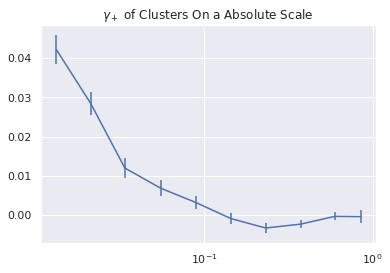

Aggregated xi:
[-32.1239 -46.245  -30.6931 -29.0433 -22.3988  11.276   58.1447  55.0821
  10.3203   3.9458]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3287.6667  -6268.1752  -8708.9286 -12386.3573 -17193.4931 -22256.1733
 -25036.3085 -22506.3759 -12733.4833  -1328.8399]
------------------------------------------------------------------------------
Aggregated npairs:
[  760.  1626.  2570.  4271.  7098. 11479. 17109. 22800. 24575.  8065.]
------------------------------------------------------------------------------
Mean xi:
[-0.0423 -0.0284 -0.0119 -0.0068 -0.0032  0.001   0.0034  0.0024  0.0004
  0.0005]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3259 -3.855  -3.3887 -2.9001 -2.4223 -1.9389 -1.4633 -0.9871 -0.5181
 -0.1648]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

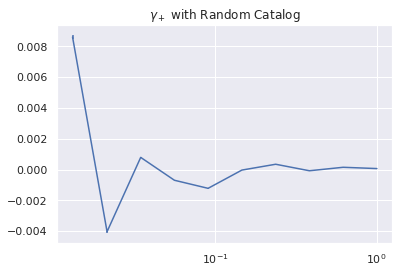

[ 8.6185e-03 -4.0265e-03  7.9752e-04 -6.8759e-04 -1.2114e-03 -2.6256e-05
  3.5231e-04 -7.0388e-05  1.5522e-04  7.1610e-05]
[-1.3110e-04  6.1247e-05 -1.2131e-05  1.0459e-05  1.8427e-05  3.9938e-07
 -5.3590e-06  1.0707e-06 -2.3610e-06 -1.0893e-06]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

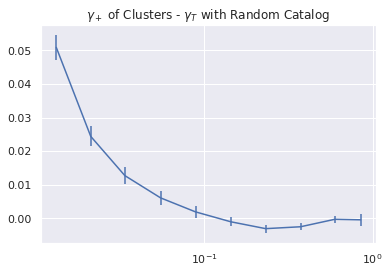

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

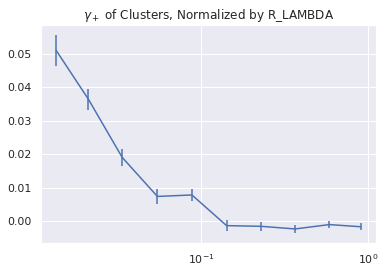

Aggregated xi:
[-21.1748 -41.1351 -40.3647 -24.2398 -42.9504  12.2196  21.9259  46.8204
  25.701   33.6293]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1790.0219  -4367.6069  -7197.0957  -9565.5636 -13371.3403 -17683.8496
 -20854.3732 -20137.6882 -13175.2253  -1991.7284]
------------------------------------------------------------------------------
Aggregated npairs:
[  416.  1132.  2121.  3291.  5504.  9062. 14130. 20059. 24752. 20002.]
------------------------------------------------------------------------------
Mean xi:
[-0.0509 -0.0363 -0.019  -0.0074 -0.0078  0.0013  0.0016  0.0023  0.001
  0.0017]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3029 -3.8583 -3.3933 -2.9066 -2.4294 -1.9514 -1.4759 -1.0039 -0.5323
 -0.0996]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)